# Lecture - Working with Rasters

In [2]:
import arcpy

In [3]:
# Describing Rasters
import os

path = r"C:\PROJECTS\DAN_SHUGAR\IMAGES\LC08_L1TP_045032_20180608_20180615_01_T1"
file = "LC08_L1TP_045032_20180608_20180615_01_T1_MTL.txt"

filename = os.path.join(path, file)

single_raster = filename
raster_info = arcpy.Describe(single_raster)
print(raster_info.format)
print(raster_info.spatialReference.name)

AFR
WGS_1984_UTM_Zone_10N


## Let's read in the raster using [RasterToNumpyArray](http://pro.arcgis.com/en/pro-app/arcpy/functions/rastertonumpyarray-function.htm)

In [4]:
myRaster = arcpy.RasterToNumPyArray(single_raster)

## What's the shape of the array?
### Notice we still haven't imported numpy

In [5]:
myRaster.shape

(8, 7861, 7731)

## We need the raster properties for when we export it

In [6]:
myRasterInfo = arcpy.Raster(single_raster)
mx = myRasterInfo.extent.XMin + myRasterInfo.meanCellWidth
my = myRasterInfo.extent.YMin + myRasterInfo.meanCellHeight
print("Cell Size = " + str(myRasterInfo.meanCellWidth))

Cell Size = 30.0


In [7]:
# slope_ras = calc_slope(myRaster, myRasterInfo.meanCellWidth)
# output_slope_ras = arcpy.NumPyArrayToRaster(slope_ras,arcpy.Point(mx, my),
#                                                  myRasterInfo.meanCellWidth,
#                                                  myRasterInfo.meanCellHeight)
# output_slope_ras.save(r"C:\Student\DEM\na_slope_numpy.tif")
# print("Total Time %s" % (datetime.datetime.now() - master_times))

## Importing matplotlib

In [7]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib notebook

## Let's look at band 1 using imshow

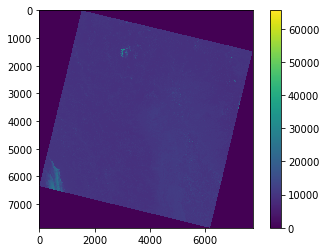

In [21]:
plt.imshow(myRaster[0,:,:])
plt.colorbar()

## We can define the colormap and the colormap extents

<IPython.core.display.Javascript object>


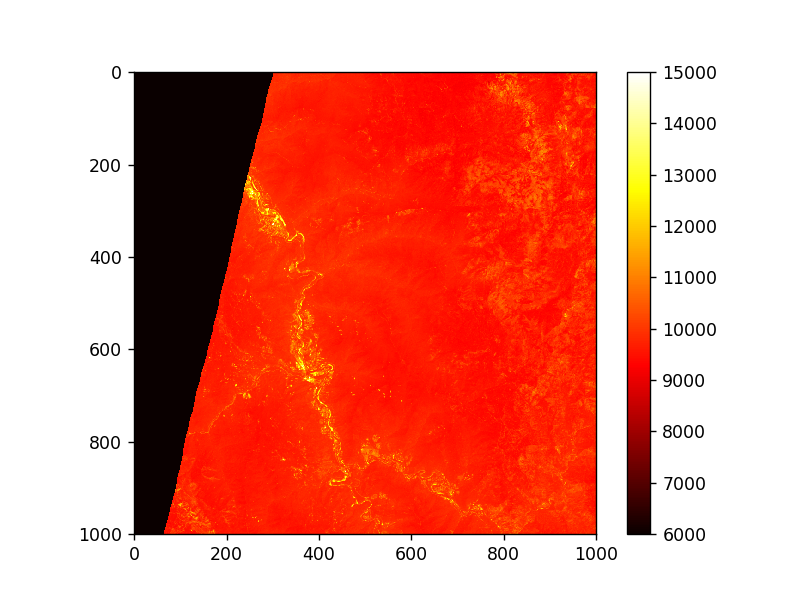

In [19]:
plt.imshow(myRaster[0,1000:2000,1000:2000], cmap="hot", clim=(6000, 15000)) #'nipy_spectral'
plt.colorbar()

<IPython.core.display.Javascript object>


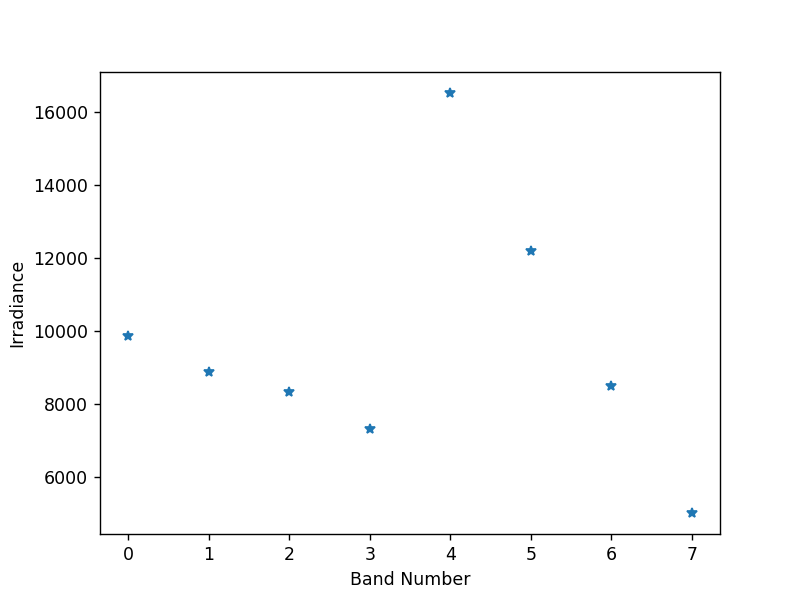

Text(0,0.5,'Irradiance')

In [24]:
plt.plot(myRaster[:,2000,2000], '*')
plt.xlabel('Band Number')
plt.ylabel('Irradiance')

## We can plot a histogram of the pixel values
### Looking at all bands

<IPython.core.display.Javascript object>


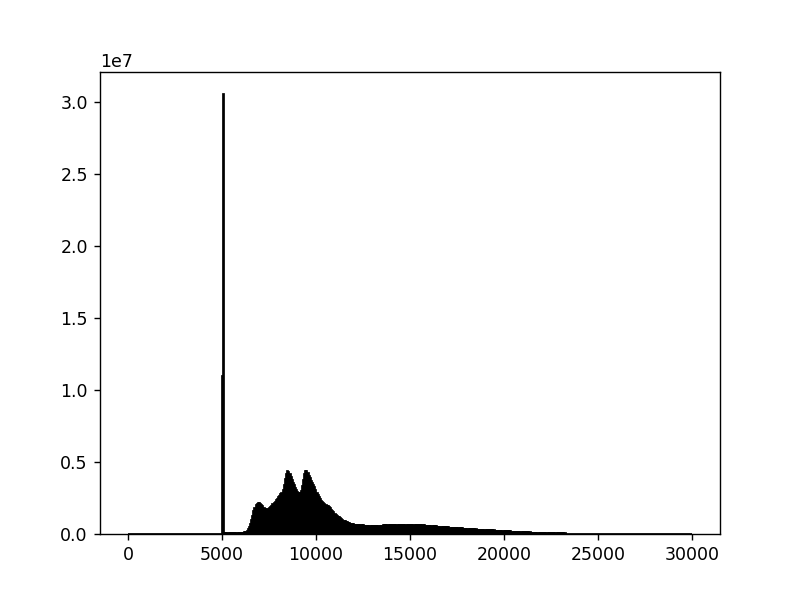

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [25]:
 plt.hist(myRaster.ravel(), bins=500, range=(1, 30000.0), fc='k', ec='k')

### Looking at 1 band

<IPython.core.display.Javascript object>


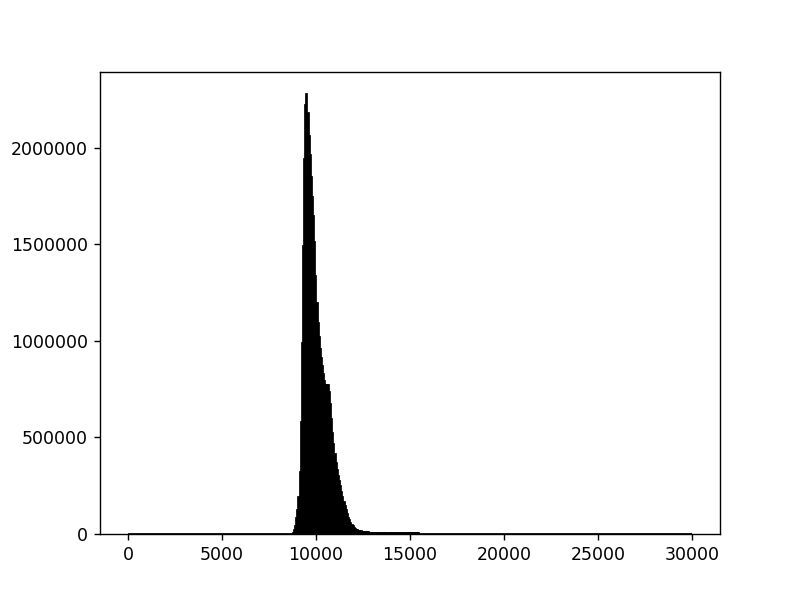

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

In [26]:
 plt.hist(myRaster[0,:,:].ravel(), bins=500, range=(1, 30000.0), fc='k', ec='k')

## For more on [imshow](https://matplotlib.org/users/image_tutorial.html)

## How do we calculate a NDVI (Normalized Difference Vegetation Index) from the Landsat Images?

### NDVI = (IR-R)/(IR+R)

### IR = Band 5
### R = Band 4

In [27]:
ndvi = (myRaster[4,:,:] - myRaster[3,:,:])/(myRaster[4,:,:] + myRaster[3,:,:])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


## Let's view the result

<IPython.core.display.Javascript object>


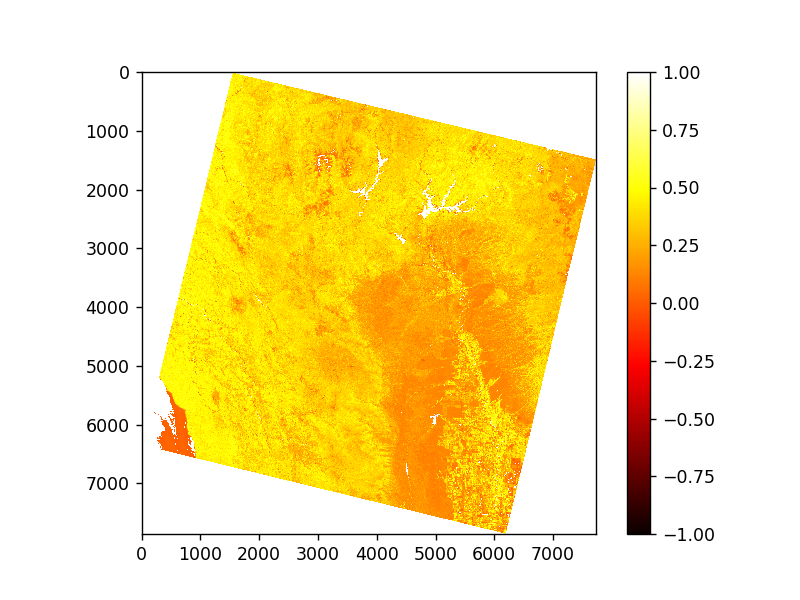

In [28]:
plt.imshow(ndvi, cmap="hot", clim=(-1,1)) #'nipy_spectral'
plt.colorbar()

## We Can save the NDVI image to a TIFF File

In [29]:
output_ras = arcpy.NumPyArrayToRaster(ndvi,arcpy.Point(mx, my),
                                                  myRasterInfo.meanCellWidth,
                                                  myRasterInfo.meanCellHeight)
output_ras.save(r"C:\Student\ndvi_11072018.tif")

## Define the projection

In [30]:
arcpy.DefineProjection_management(in_dataset=r"C:\Student\ndvi.tif", coor_system=raster_info.spatialReference)

<Result 'C:\\Student\\ndvi.tif'>

## Let's look at the Raster's in ArcMap

# Brake - Are you all with me still?

## What if these were single bands?

In [1]:
import arcpy

In [32]:
band4 =os.path.join(path,"LC08_L1TP_045032_20180608_20180615_01_T1_B4.TIF")
band5 = os.path.join(path,"LC08_L1TP_045032_20180608_20180615_01_T1_B5.TIF")

In [33]:
raster_info = arcpy.Describe(band4)
print(raster_info.format)
print(raster_info.spatialReference.name)

TIFF
WGS_1984_UTM_Zone_10N


In [34]:
band4_pixels = arcpy.RasterToNumPyArray(band4)
band5_pixels = arcpy.RasterToNumPyArray(band5)

In [35]:
ndvi = (band5_pixels - band4_pixels)/(band5_pixels + band4_pixels)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [36]:
import matplotlib.pyplot as plt

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


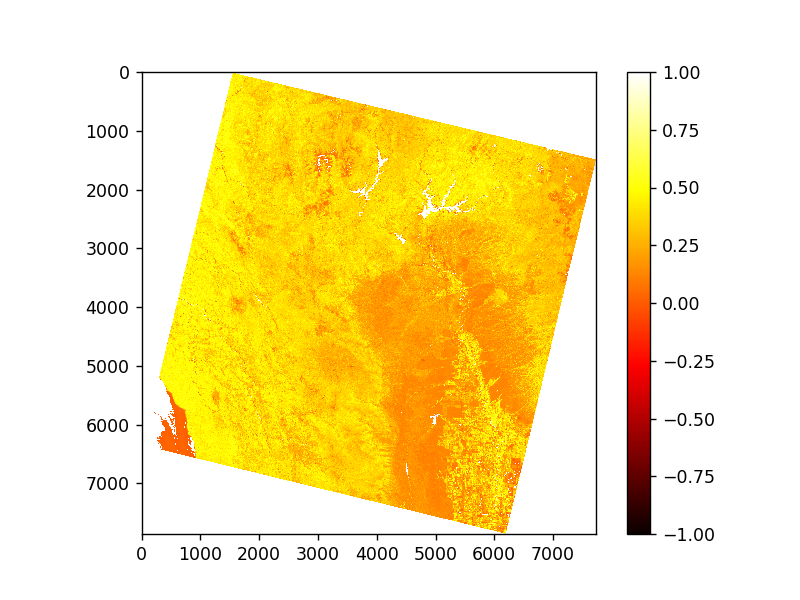

In [38]:
plt.imshow(ndvi, cmap="hot", clim=(-1,1)) #'nipy_spectral'
plt.colorbar()

## Other ideas

Building on what you read in the Python Data Science Handbook, let's look at a few things.

## [Array Concatenation](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Array-Concatenation-and-Splitting)

Let's say we want to build bands 4 and 5 into a *multiband* raster.  We can concatenate the two arrays into a 2-band numpy array.

In [39]:
import numpy as np

In [40]:
bands_4_and_5 = np.concatenate([band4_pixels, band5_pixels])

In [41]:
bands_4_and_5.shape

(15722, 7731)

## Hmmmm... This isn't what I was expecting.

In [42]:
bands_4_and_5 = np.stack((band4_pixels, band5_pixels))

In [43]:
bands_4_and_5.shape

(2, 7861, 7731)

In [44]:
band4_pixels.shape, band5_pixels.shape

((7861, 7731), (7861, 7731))

## That's better :)

## [Zeros](https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html)

In [45]:
landsat_pixels = np.zeros((8, band4_pixels.shape[0], band4_pixels.shape[1] ))

In [47]:
landsat_pixels.shape

(8, 7861, 7731)

<IPython.core.display.Javascript object>


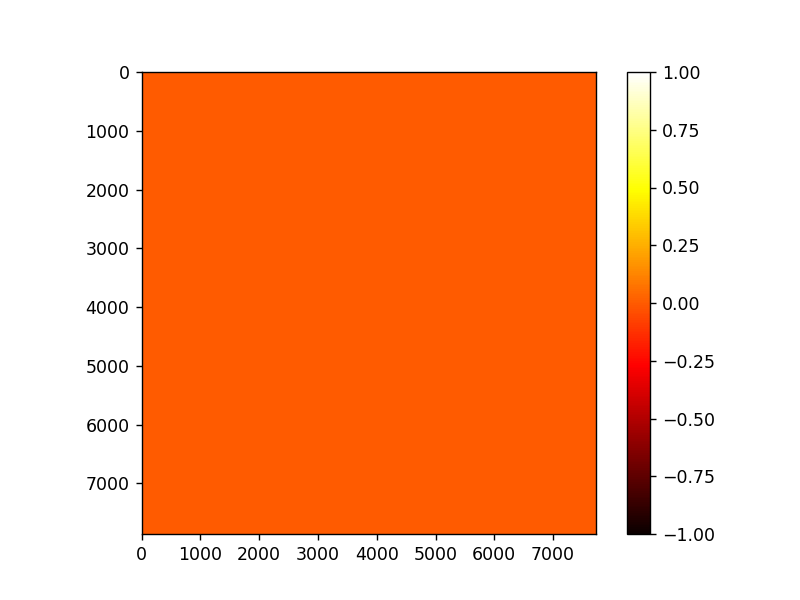

In [49]:
plt.imshow(landsat_pixels[0,:,:], cmap="hot", clim=(-1,1)) #'nipy_spectral'
plt.colorbar()

In [50]:
for digit in range(0,36):
    print(digit)
    fname = os.path.join(path,"LC08_L1TP_045032_20180608_20180615_01_T1_B" + str(digit) + ".TIF")
    landsat_pixels[digit-1,:,:] = arcpy.RasterToNumPyArray(fname)

1
2
3
4
5
6
7
8


ValueError: could not broadcast input array from shape (15721,15461) into shape (7861,7731)

## Band 8 breaks things becuase it is the panchromatic band, which is twice the resolution! See [here](https://landsat.usgs.gov/what-are-band-designations-landsat-satellites) for more about the landsat bands.

In [27]:
landsat_pixels = np.zeros((7, band4_pixels.shape[0], band4_pixels.shape[1] ))
for digit in range(1,8):
    fname = r"C:\PROJECTS\DAN_SHUGAR\IMAGES\LC08_L1TP_045032_20180608_20180615_01_T1\LC08_L1TP_045032_20180608_20180615_01_T1_B" + str(digit) + ".TIF"
    landsat_pixels[digit-1,:,:] = arcpy.RasterToNumPyArray(fname)

In [29]:
ndvi = (landsat_pixels[4,:,:] - landsat_pixels[3,:,:])/(landsat_pixels[4,:,:] + landsat_pixels[3,:,:])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


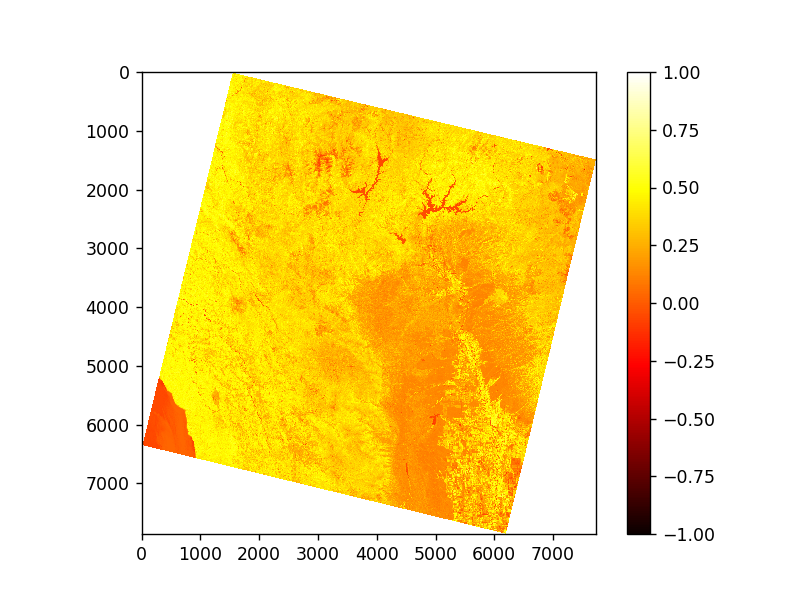

In [30]:
plt.imshow(ndvi, cmap="hot", clim=(-1,1)) #'nipy_spectral'
plt.colorbar()

<IPython.core.display.Javascript object>


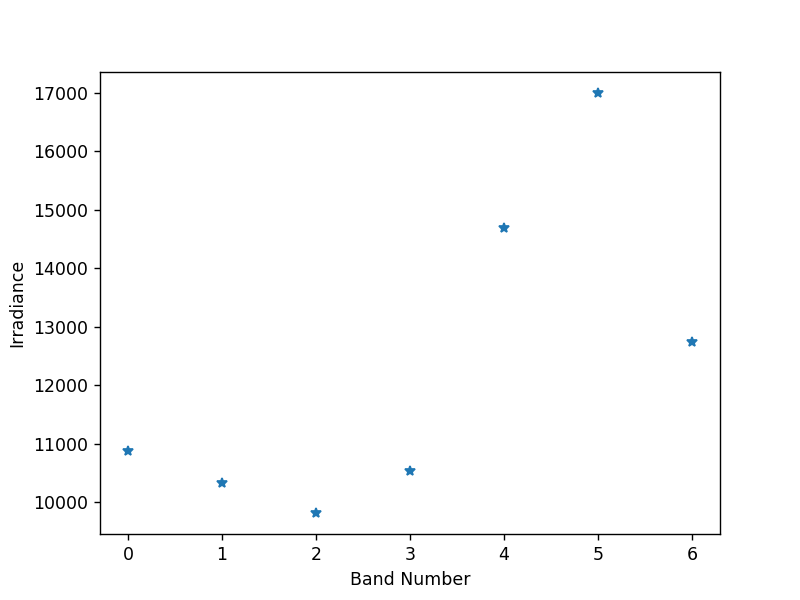

Text(0,0.5,'Irradiance')

In [38]:
plt.plot(landsat_pixels[:,4000,4000], '*')
plt.xlabel('Band Number')
plt.ylabel('Irradiance')

## So why am I showing you this?

Becuase this is something you should use when you approach problem 3

## In Class Problem 3:
The Climate Hazards Group at UC Santa Barbera produces a 30+ year quasi global dataset called [CHIRPS](http://chg.geog.ucsb.edu/data/chirps/). You can download the precipitation data as rasters here: ftp://ftp.chg.ucsb.edu/pub/org/chg/products/CHIRP/. 

For this exercise:
1. Download the first 36 rasters here: ftp://ftp.chg.ucsb.edu/pub/org/chg/products/CHIRP/dekads/. 
    - This data has 3 precipitation rasters per month, 1 every ten days, totaling 36 rasters in a year. 
2. Read each raster into a numpy array and concatenate those numpy arrays into a matrix of dimmension (36,x,y)
3. Using *matplotlib*, plot a few slices of the array so that we can see the rainfall over time.
4. **Are the rainfall trends periodic?**
5. **Challenge** Extract the time frame the filenames and plot some rainfall values (on the y-axis) vs. time (on the x-axis).